In [143]:
##!pip install seaborn
##!pip install pandas
##!pip install numpy

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_distras = pd.read_csv('./Reto/datadistras.csv',encoding = 'unicode_escape'
                         ,dayfirst=True
                         ,parse_dates=['FECHA_VENCIMIENTO','FECHA_DOCUMENTO'])

c:\users\joinner\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [145]:
df_distras.dropna(axis="columns", how="all")

,NOMBRE_DOCUMENTO_MAESTRO,NOMBRE_CONSECUTIVO,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,FECHA_DOCUMENTO,FECHA_VENCIMIENTO,IDENTIFICACION_TERCERO,NOMBRE_TERCERO,ID_CENTRO_COSTO,NOMBRE_CENTRO_COSTO,...,TIPO,MARCA,LINEA,GRUPO,CLASE,NOMBRE_ESTABLECIMIENTO,ID_USUARIO_CREA,USUARIO_CREA,ID_TERCERO,ID_VENDEDOR
0,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1023-SOLDADURA PVC CEMENTO SOLVENTE,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
1,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1007-ACCESORIOS PRESION LISO-ROSCADO,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
2,FACTURA,FACTURA ELECTRONICA DEV,DEV,3077,2020-01-02,2020-02-01,900247351,ECHEVERRI INVERSIONES CAMEL SOCIEDAD POR ACCIO...,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1036-TUBERIA PRESION EXTREMO LISO,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,4509,1856
3,FACTURA,FACTURA ELECTRONICA DEV,DEV,3079,2020-01-02,2020-01-04,890226,GOMEZ MORA HELIODORO JOSE,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1009-ACCESORIOS SANITARIO - VENTILACION,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,19606,1856
4,FACTURA,FACTURA ELECTRONICA DEV,DEV,3079,2020-01-02,2020-01-04,890226,GOMEZ MORA HELIODORO JOSE,8003,SV VENTAS,...,NaN,017-GERFOR,NaN,1009-ACCESORIOS SANITARIO - VENTILACION,NaN,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,19606,1856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222267,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,3403-CANALETAS CABALLETES Y METALDECK,C001-ACESCO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222268,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,3408-PERFIL 120 X 60,C001-ACESCO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222269,FACTURA,FACTURA ELECTRONICA DEV,DEV,63439,2021-10-09,2021-10-11,30688792,SANDRA MILENA SUAREZ MAFIOLI,8003,SV VENTAS,...,NaN,030-MARCA GENERICA,L076-LINEA GENERICA,1607-ANGULOS,C025-DIACO,NaN,25785971,LEDA YIMARA ARGUMEDO DIAZ,36529,1856
222270,FACTURA,FACTURA ELECTRONICA DEV,DEV,63443,2021-10-09,2021-10-10,77031265,NAVARRO CUELLO JOSEJOAQUIN,8003,SV VENTAS,...,T024-GENERICO,007-CERAMICA ITALIA,L076-LINEA GENERICA,7803-CERAMICA 30 X 60,C015-CERAMICA ITALIA,NaN,1067934023,ADRIANA LISETH GARCIA CARBONO,29739,1856


In [146]:
df_distras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222272 entries, 0 to 222271
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   NOMBRE_DOCUMENTO_MAESTRO  222272 non-null  object        
 1   NOMBRE_CONSECUTIVO        222272 non-null  object        
 2   TIPO_DOCUMENTO            222272 non-null  object        
 3   NUMERO_DOCUMENTO          222272 non-null  int64         
 4   FECHA_DOCUMENTO           222272 non-null  datetime64[ns]
 5   FECHA_VENCIMIENTO         222272 non-null  datetime64[ns]
 6   IDENTIFICACION_TERCERO    222272 non-null  object        
 7   NOMBRE_TERCERO            222272 non-null  object        
 8   ID_CENTRO_COSTO           222272 non-null  int64         
 9   NOMBRE_CENTRO_COSTO       222272 non-null  object        
 10  NOMBRE_CLASIFICACION      222272 non-null  object        
 11  ID_PRODUCTO_SERVICIO      222272 non-null  int64         
 12  PR

In [147]:
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].str.replace(',','')
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].astype('float')

In [148]:
df_distrias_vend = df_distras.groupby(["NOMBRE_VENDEDOR"]).agg(
    {'CANTIDAD':'sum'})
df_distrias_vend.nlargest(n=10, columns=['CANTIDAD'])

,CANTIDAD
NOMBRE_VENDEDOR,
ACOSTA SUAREZ EDUARDO,4607052.64
HERAZO RIVERA JOVANI DE JESUS,901876.96
RUIZ RODRIGUEZ FERNANDO ENRIQUE,572647.43
JIMENEZ TENORIO NATALIA,439150.98
1 PISO,412326.84
MAYA PELAEZ LINA MARIA,364337.03
MARTINEZ CASTILLA CRISTIAN YESID,311063.65
BOLIVAR NARANJO HUMBERTO JAIME,178751.33
BOLIVAR NARANJO ADOLFO JAVIER,134598.59


In [149]:
df_distrias_estla = df_distras.groupby(["NOMBRE_ESTABLECIMIENTO"]).agg(
    {'CANTIDAD':'sum'
    ,'PORCENTAJE_DESCUENTO':'mean'})
df_distrias_estla.nlargest(n=10, columns=['CANTIDAD'])

,CANTIDAD,PORCENTAJE_DESCUENTO
NOMBRE_ESTABLECIMIENTO,,
CUMI,83201.74,8.198745
ACABADOS BERTEL S.A.S.,60896.00,0.694915
CONSORCIO HOSPITALARIO DE CORDOBA,51994.50,13.593220
AQUALIA S.A E.S.P,50801.74,21.995665
DISTRIBUCIONES GSG,50585.53,1.494206
VIAS POR CORDOBA,48118.40,3.457143
AQUA DE ORO,45212.00,19.240444
RMP DEPORTIVO,45026.50,13.638177
CARRETRO PLANETA RICA,45006.00,8.969697


In [150]:
df_distras.drop(labels=["NOMBRE_DOCUMENTO_MAESTRO","NOMBRE_CONSECUTIVO"
                        ,"TIPO_DOCUMENTO","NUMERO_DOCUMENTO"], axis="columns",inplace=True)

In [151]:
df_distras.drop(labels=["IDENTIFICACION_TERCERO","NOMBRE_TERCERO","ID_CENTRO_COSTO"
                        ,"NOMBRE_CENTRO_COSTO","NOMBRE_CLASIFICACION"], axis="columns",inplace=True)

In [152]:
df_distras.drop(labels=["CEDULA_VENDEDOR","NOMBRE_VENDEDOR","FORMA_DE_PAGO"], axis="columns",inplace=True)

In [153]:
df_distras.drop(labels=["USUARIO_CREA","ID_TERCERO"], axis="columns",inplace=True)

In [154]:
df_distras['FECHA_DOCUMENTO'] = pd.to_datetime(df_distras['FECHA_DOCUMENTO'])

In [155]:
df_distras['FECHA_VENCIMIENTO'] = pd.to_datetime(df_distras['FECHA_VENCIMIENTO'])

In [156]:
df_distras['PRODUCTO_SERVICIO'] = df_distras['PRODUCTO_SERVICIO'].astype('category')

In [157]:
df_distras['VALOR_UNITARIO'] = df_distras['VALOR_UNITARIO'].str.replace(',','')
df_distras['VALOR_TOTAL'] = df_distras['VALOR_TOTAL'].str.replace(',','')
df_distras['VALOR_DESCUENTO'] = df_distras['VALOR_DESCUENTO'].str.replace(',','')
df_distras['SUBTOTAL'] = df_distras['SUBTOTAL'].str.replace(',','')
df_distras['IVA'] = df_distras['IVA'].str.replace(',','')
df_distras['TOTAL_NETO'] = df_distras['TOTAL_NETO'].str.replace(',','')
df_distras['UTILIDAD'] = df_distras['UTILIDAD'].str.replace(',','')
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].str.replace(',','')
df_distras['COSTO'] = df_distras['COSTO'].str.replace(',','')

In [158]:
df_distras['CANTIDAD'] = df_distras['CANTIDAD'].astype('float')
df_distras['VALOR_UNITARIO'] = df_distras['VALOR_UNITARIO'].astype('float')
df_distras['VALOR_TOTAL'] = df_distras['VALOR_TOTAL'].astype('float')
df_distras['PORCENTAJE_DESCUENTO'] = df_distras['PORCENTAJE_DESCUENTO'].astype('float')
df_distras['VALOR_DESCUENTO'] = df_distras['VALOR_DESCUENTO'].astype('float')
df_distras['SUBTOTAL'] = df_distras['SUBTOTAL'].astype('float')
df_distras['IVA'] = df_distras['IVA'].astype('float')
df_distras['TOTAL_NETO'] = df_distras['TOTAL_NETO'].astype('float')
df_distras['UTILIDAD'] = df_distras['UTILIDAD'].astype('float')
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].astype('float')
df_distras['COSTO'] = df_distras['COSTO'].astype('float')

In [159]:
df_distras['RENTABILIDAD'] = df_distras['RENTABILIDAD'].fillna(0.0)
df_distras["YEAR"] = df_distras["FECHA_DOCUMENTO"].dt.year

In [160]:
df_distras['FECHA_DOCUMENTO'].max()

Timestamp('2021-10-09 00:00:00')

In [161]:
df_distras["MONTH"] = df_distras["FECHA_DOCUMENTO"].dt.month

In [162]:
df_distrias_grouped = df_distras.groupby(["YEAR","MONTH"]).agg(
    {'CANTIDAD':'sum','TOTAL_NETO':'sum'
     ,'ID_PRODUCTO_SERVICIO':'nunique'
     ,'ID_PRODUCTO_SERVICIO':'count'
     ,'PRODUCTO_SERVICIO':'nunique'
     ,'VALOR_UNITARIO':'mean'
     ,'VALOR_TOTAL':'sum'
     ,'PORCENTAJE_DESCUENTO':'mean'
     ,'VALOR_DESCUENTO':'sum'
     ,'SUBTOTAL':'sum'
     ,'IVA':'sum'
     ,'UTILIDAD':'sum'
     ,'RENTABILIDAD':'mean'
     ,'COSTO':'sum'})

In [163]:
df_distrias_grouped.reset_index(inplace=True) 

In [164]:
df_distrias_grouped['TOTAL_ACUMULADO'] = df_distrias_grouped['VALOR_TOTAL'].cumsum()

In [165]:
df_distrias_prods = df_distras.groupby(["PRODUCTO_SERVICIO"]).agg(
    {'CANTIDAD':'sum','TOTAL_NETO':'sum'
     ,'VALOR_UNITARIO':'mean'
     ,'VALOR_TOTAL':'sum'
     ,'PORCENTAJE_DESCUENTO':'mean'
     ,'VALOR_DESCUENTO':'sum'
     ,'SUBTOTAL':'sum'
     ,'IVA':'sum'
     ,'UTILIDAD':'sum'
     ,'RENTABILIDAD':'mean'
     ,'COSTO':'sum'})
df_distrias_prods.nlargest(n=10, columns=['CANTIDAD'])



,CANTIDAD,TOTAL_NETO,VALOR_UNITARIO,VALOR_TOTAL,PORCENTAJE_DESCUENTO,VALOR_DESCUENTO,SUBTOTAL,IVA,UTILIDAD,RENTABILIDAD,COSTO
PRODUCTO_SERVICIO,,,,,,,,,,,
CEMENTO GRIS ARGOS UG X 50KL,813236.0,1.957187e+10,22654.841656,1.686261e+10,3.418111,4.024748e+08,1.646013e+10,3.111734e+09,2.611692e+09,7.626396,1.384844e+10
LADRILLO N°4 6H (9X19X38) RAYADO,488929.0,6.378935e+08,1428.588154,6.392227e+08,0.169492,1.329220e+06,6.378935e+08,0.000000e+00,2.404134e+08,16.971403,3.974801e+08
VARILLA NTC 2289 3/8 x 60 LEG x 6 MTS,456895.0,5.469544e+09,13192.412982,5.013619e+09,7.985902,4.108778e+08,4.602741e+09,8.668036e+08,8.416393e+08,7.926175,3.761101e+09
TORN ROSCA FINA N°6 6X1 DRYWALL,387040.0,4.134090e+06,13.140123,3.515390e+06,0.104938,3.874000e+03,3.511516e+06,6.225745e+05,1.058146e+06,14.935586,2.453370e+06
TORN ROSCA FINA N°7 7-1/6 X 7/16 DRYWALL,377170.0,3.550885e+06,14.515321,2.988992e+06,0.155963,3.647000e+03,2.985345e+06,5.655399e+05,8.870150e+05,11.817018,2.098330e+06
VARILLA NTC 2289 1/2 x 60 LEG x 6 MTS,338776.0,6.286061e+09,22040.585863,5.863799e+09,8.810313,5.670251e+08,5.296774e+09,9.892868e+08,8.685275e+08,8.326508,4.428247e+09
VARILLA NTC 2289 1/4 x 60 LEG x 6 MTS,285410.0,1.869191e+09,6049.674751,1.678150e+09,6.550894,1.074011e+08,1.570749e+09,2.984423e+08,3.901280e+08,11.926449,1.180621e+09
ALAMBRE NEGRO,212779.0,1.129157e+09,5236.227462,9.681982e+08,1.530634,1.860505e+07,9.495931e+08,1.795643e+08,2.507207e+08,13.338583,6.988724e+08
TORNILLO AUTPERFORANTE 1 1/2 ARAND.25MM PARA METAL,161564.0,8.303174e+07,550.176492,7.030964e+07,0.367647,5.350698e+05,6.977457e+07,1.325717e+07,1.948157e+07,14.257857,5.029300e+07


<h1>Procedo a tratar y escalar los datos para aplicar modelo</h1>

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import os
scaler = StandardScaler()

In [167]:
df_distrias_grouped.head()

,YEAR,MONTH,CANTIDAD,TOTAL_NETO,ID_PRODUCTO_SERVICIO,PRODUCTO_SERVICIO,VALOR_UNITARIO,VALOR_TOTAL,PORCENTAJE_DESCUENTO,VALOR_DESCUENTO,SUBTOTAL,IVA,UTILIDAD,RENTABILIDAD,COSTO,TOTAL_ACUMULADO
0,2020,1,683588.82,6.797490e+09,13830,1840,47725.124897,6.099290e+09,7.879807,3.793073e+08,5.719983e+09,1.077507e+09,9.731887e+08,-387.320445,4.746794e+09,6.099290e+09
1,2020,2,523719.52,6.555708e+09,12885,1849,43200.797488,5.879280e+09,7.716237,3.623042e+08,5.516975e+09,1.038733e+09,9.202726e+08,4.454511,4.596703e+09,1.197857e+10
2,2020,3,407605.34,4.893138e+09,9220,1565,39954.018304,4.400616e+09,8.042345,2.833570e+08,4.117259e+09,7.758794e+08,7.452821e+08,0.000000,3.371976e+09,1.637919e+10
3,2020,4,297522.97,1.199005e+09,2423,769,47772.044965,1.092453e+09,8.238556,8.442014e+07,1.008033e+09,1.909719e+08,2.225044e+08,0.000000,7.855285e+08,1.747164e+10
4,2020,5,397292.38,2.397420e+09,6424,1360,45476.159630,2.099231e+09,6.648669,8.089801e+07,2.018333e+09,3.790867e+08,4.321828e+08,0.000000,1.586151e+09,1.957087e+10


In [168]:
Y = df_distrias_grouped['CANTIDAD']
Y = Y.drop(index=Y.index[0], 
        axis=0)
standard_df = scaler.fit_transform(df_distrias_grouped)
standard_df = pd.DataFrame(standard_df,columns = list(df_distrias_grouped.columns))
#X = df_distrias_grouped#['VALOR_TOTAL']
#X = pd.factorize(standard_df['COSTO'])[0].reshape(-1, 1) 
X = standard_df#df_distrias_grouped['VALOR_DESCUENTO']
#sns.boxplot(x=df_distrias_grouped['VALOR_UNITARIO'])
X.drop(['CANTIDAD'], axis = 1, 
        inplace=True)
X.drop(index=X.index[-1], 
        axis=0, 
        inplace=True)
#X = pd.factorize(X)[0].reshape(-1, 1) 

In [169]:
#sns.boxplot(x=df_distrias_grouped['PRODUCTO_SERVICIO'])

In [170]:
#sns.boxplot(x=df_distrias_grouped['TOTAL_NETO'])

<AxesSubplot:xlabel='CANTIDAD'>

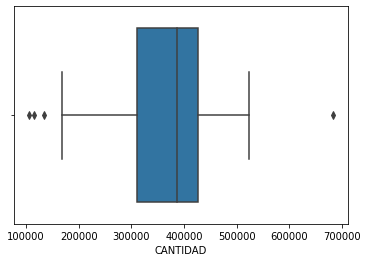

In [171]:
sns.boxplot(x=df_distrias_grouped['CANTIDAD'])

<AxesSubplot:xlabel='RENTABILIDAD'>

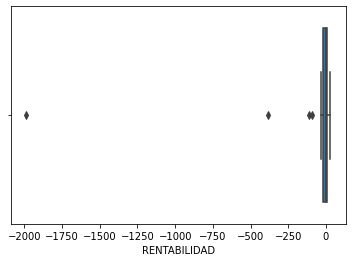

In [172]:
sns.boxplot(x=df_distrias_grouped['RENTABILIDAD'])

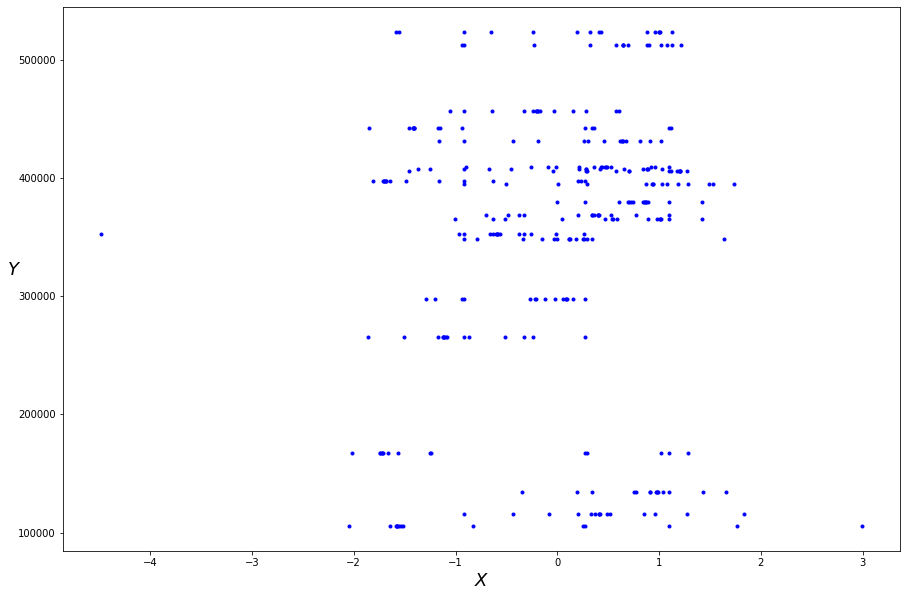

In [173]:
plt.figure(figsize=(15,10))
plt.plot(X,Y,"b.")#plt.plot(X,Y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.show()

<h1>Aplico Regresion Lineal y Ridge</h1>

In [216]:
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.222)#, random_state=42
lin_reg.fit(X_train, y_train)
#lin_reg.intercept_, lin_reg.coef_

LinearRegression()

In [218]:
from sklearn.metrics import mean_absolute_error
# Make predictions using the testing set
Y_pred = lin_reg.predict(X_test)
# Realizo predicion con los otros dataframe de pruebas.
Y_pred2 = lin_reg.predict(X_train)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)
#The mean squared error test
#print(f"Mean squared error of test: {mean_squared_error(y_test, Y_pred)}")
print(f"Mean absolute error of test: {mean_absolute_error(y_test, Y_pred)}")
# The mean squared error train
print(f"Mean squared error of Train: {mean_squared_error(y_train, Y_pred2)}")
#print("Mean squared error: %.2f" % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, Y_pred)}")

Coefficients: 
 [ 1.18892510e+06  1.07854988e+06 -7.73835165e+11 -5.89567157e+05
 -3.46150957e+05  1.85491095e+05  4.53721058e+14  5.28860827e+04
 -3.94935121e+13 -4.21100109e+14  1.22577355e+11  4.41368678e+07
 -3.10907968e+04  1.74256985e+08 -1.66275434e+06]
Mean absolute error of test: 211768.8744080727
Mean squared error of Train: 0.022907929672351685
Coefficient of determination: -25.021105306094462


(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 2.]),
 array([265830.36 , 280007.858, 294185.356, 308362.854, 322540.352,
        336717.85 , 350895.348, 365072.846, 379250.344, 393427.842,
        407605.34 ]),
 <BarContainer object of 10 artists>)

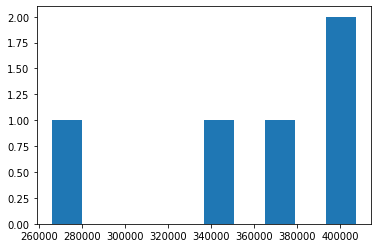

In [219]:
plt.hist(y_test)

(array([2., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([124061.0624916 , 203039.2285106 , 282017.39452961, 360995.56054862,
        439973.72656762, 518951.89258663, 597930.05860564, 676908.22462464,
        755886.39064365, 834864.55666266, 913842.72268166]),
 <BarContainer object of 10 artists>)

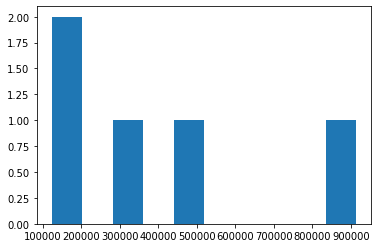

In [220]:
plt.hist(Y_pred)

<h1>Grafico los valores</h1>

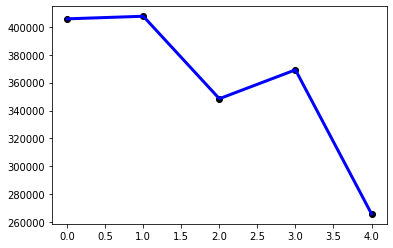

In [221]:
# Plot outputs
X_test_sample = pd.factorize(X_test['COSTO'])[0].reshape(-1, 1)
plt.scatter(X_test_sample, y_test, color="black")
plt.plot(X_test_sample, y_test, color="blue", linewidth=3)

In [222]:
from sklearn.linear_model import Ridge
#n_samples, n_features = Y.count(),X.shape[1]
#g = np.random.RandomState(0)
# = rng.randn(n_samples)
# = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)#fit(X, y)

# Make predictions using the testing set
Y_pred = clf.predict(X_test)
# Realizo predicion con los otros dataframe de pruebas.
#Y_pred2 = clf.predict(X_train)

# The coefficients
print("Coefficients: \n", clf.coef_)
print(f"Mean squared error of test: {mean_absolute_error(y_test, Y_pred)}")


Coefficients: 
 [  -2699.46743141   13055.90545329   11504.32414495   55512.06371504
  -12902.04919475   -5602.12735495     325.80039208    7619.50725327
 -124547.65851337   12013.35616021    8798.77103933   70572.03917372
    7973.33110856   -2760.98119555  -57091.72859319]
Mean squared error of test: 84196.84381356873


Pocos datos.
Se toma en general en estadistica de todos los productos de la empresa.
Comportamientos ciclicos o estacionales.
Resumen de las variables.
Top de 5 de los productos.
Recomendacion.
Con este modelo se podria estimar las cantidades estimadas que se podria con este mismo.
